# reco mass tail discrepency

## Recap:

 - We saw discrepency in electron-photon reconstructed mass between data and combined MC
 - MC predicts a much longer tail than what is shown in data
 - selecting high mass events, data tends to concentrate in end cap, whereas eta distribution is flat for MC
 



|          |  MET<25   |MET>25, inv Z cut  |
|----------|-----------|-----------|
|pass eVeto|A          |Signal     |
|fail eVeto|B          | D         |

### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20  
- electron: medium, pT>10 (will move to tight)
- muon: tight, pT> 25

### Signal region cuts (e channel)

 - photon pT > 50
 - inverse Z mass cut (Width?)
 - photon passing electron veto (Pixel Seed?)
 

### MC samples:
- ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/
- DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/ 

- [incomplete]

## Import Samples

In [2]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


In [3]:
 %run interactiveStackTree.py --baseDir  /data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/  \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --jupyt --quiet
 # /data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/

Welcome to JupyROOT 6.10/05
-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
DYJetsToLL_M-50                xsec : 5.77e+03 pb Nevent : 49144274 lumi : 8.52e+03 scale :     4.21
ZGTo2LG                        xsec :      118 pb Nevent : 9321494  lumi : 7.91e+04 scale :    0.454
TTJets_DiLept                  xsec :     85.7 pb Nevent : 6094476  lumi : 7.11e+04 scale :    0.505
TTJets_SingleLeptFromT         xsec :      179 pb Nevent : 11957043 lumi : 6.69e+04 scale :    0.537
TTJets_SingleLeptFromTbar      xsec :      179 pb Nevent : 46455353 lumi :  2.6e+05 scale :    0.138
TTGJets                        xsec :      3.7 pb Nevent : 1577833  lumi : 4.27e+05 scale :   0.0841
WWTo2L2Nu                      xsec :     12.2 pb Nevent : 1        lumi :   0.0821 scale : 4.37e+05
WGToLNuG-amcatnloFXFX          xsec :      822 pb Nevent : 3235156  lumi : 3.94e+03 scale :     9.12
WGToLNuG-madgraphMLM           xsec :      405 pb Nevent : 6103

In [4]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
base1 = 'ph_n==1 && el_n==1'
base1eta = base1 + ' && abs(ph_eta[0])<1.4'
a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
b4 = '&& ph_hasPixSeed[0]==1'
ltmet = '&&met_pt<25'
gtmet = '&&met_pt>25'
phpt50 = "&&ph_pt[0]>50"

In [5]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)
samples.change_stack_order("GammaGamma","Wjets")

## Fill histogram

### photon eta less than 1.4

- the largest discrepency occurs when photon lands in the barrel
    - $\gamma\gamma$: one of the two photon fakes an electron
    - Wgamma: MET is mismeasured in this sample, but otherwise no fakes
    - Z+jets: electron faking photon

In [27]:
samples.deactivate_all_samples()
samples.activate_sample(["Z+jets","Zgamma","Data","Wgamma","GammaGamma"])
select = "( isData ? 1 : PUWeight * NLOWeight )*"+"(ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25)"
samples.Draw("m_lep_ph",select,(120,0,600),{"xlabel":"m(e,#gamma)","logy":1,"blind":False});

Activate sample Z+jets
Activate sample Zgamma
Activate sample Data
Activate sample Wgamma
Activate sample GammaGamma
m_lep_ph : ( isData ? 1 : PUWeight * NLOWeight )*(ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25)
Creating hist for Data
Data  is DATA!!
0.04


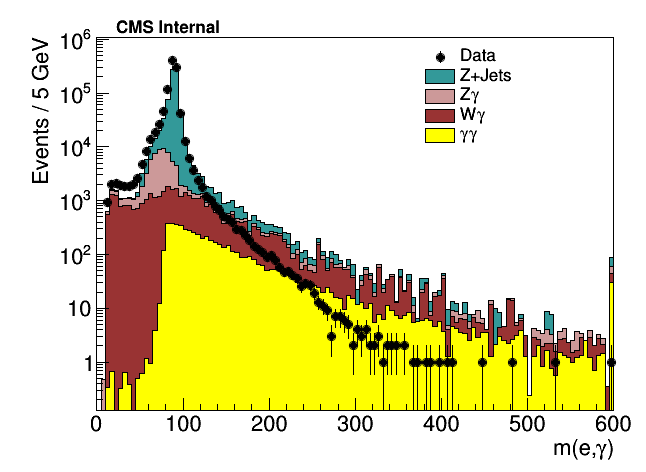

Info in <TCanvas::Print>: png file /tmp/tmpaKvPZF.png has been created


In [28]:
samples.curr_canvases["top"]

In [29]:
samples.Draw("ph_eta[0]","( isData ? 1 : PUWeight * NLOWeight ) *(met_pt<25  && m_lep_ph>300)",(100,-4,4),{"xlabel":"ph eta","logy":1,"ymax":1e7,"blind":False});

ph_eta[0] : ( isData ? 1 : PUWeight * NLOWeight ) *(met_pt<25  && m_lep_ph>300)
Creating hist for Data
Data  is DATA!!
0.04


## photon eta distribution in high mass tail

 - MC has a flat distribution in eta, whereas Data tends to the beampipe

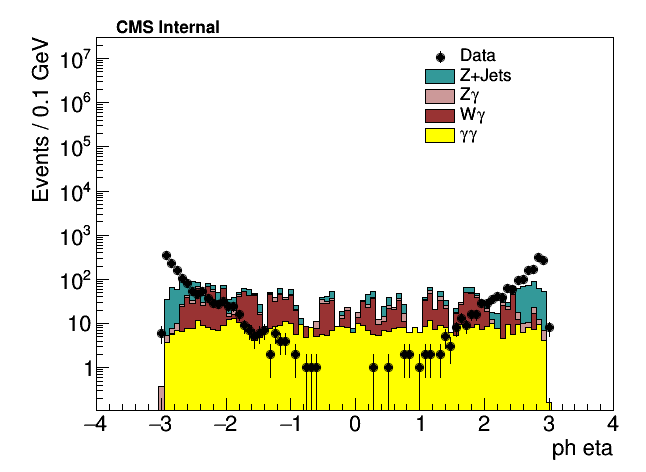

Info in <TCanvas::Print>: png file /tmp/tmpf3x9D6.png has been created


In [30]:
samples.curr_canvases["top"]

## MET in high mass tail

In [43]:
samples.Draw("met_pt","( isData ? 1 : PUWeight * NLOWeight )*"+"(met_pt<25&& m_lep_ph>200&& abs(ph_eta[0])<1.4)",(30,0,30),{"xlabel":"MET","logy":1,"ymax":1e5,"blind":False});

met_pt : ( isData ? 1 : PUWeight * NLOWeight )*(met_pt<25&& m_lep_ph>200&& abs(ph_eta[0])<1.4)
Creating hist for Data
Data  is DATA!!
0.04


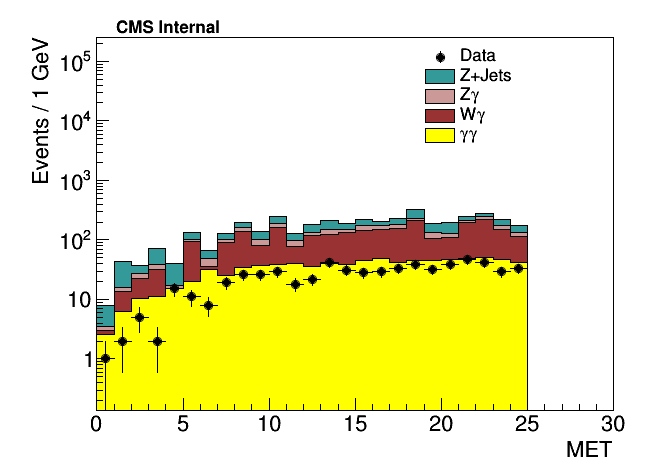

Info in <TCanvas::Print>: png file /tmp/tmpnGo4Eh.png has been created


In [44]:
samples.curr_canvases["top"]

## MET in control region 

- required photon failing pixel seed veto
- $m(e,\gamma)$ > 150

### In endcap

In [45]:
samples.Draw("met_pt","( isData ? 1 : PUWeight * NLOWeight )*(!ph_IsEB[0] && m_lep_ph>150"+b4+")",(100,0,100),{"xlabel":"MET","logy":1,"ymax":1e5,"blind":False});

met_pt : ( isData ? 1 : PUWeight * NLOWeight )*(!ph_IsEB[0] && m_lep_ph>150&& ph_hasPixSeed[0]==1)
Creating hist for Data
Data  is DATA!!
0.04


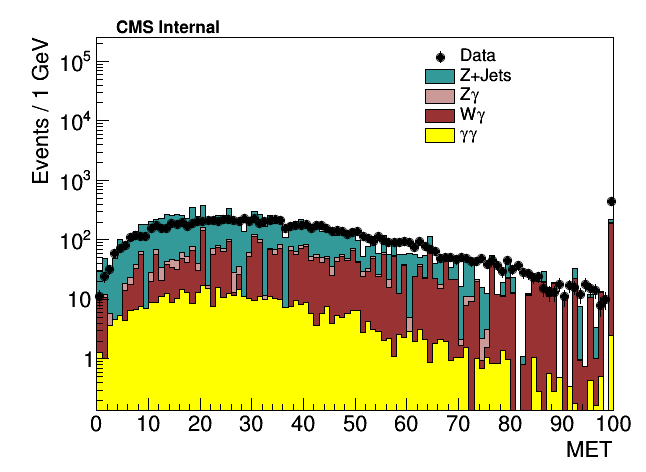

Info in <TCanvas::Print>: png file /tmp/tmp0j36ue.png has been created


In [46]:
samples.curr_canvases["top"]

### In barrel

In [41]:
samples.Draw("met_pt","ph_IsEB[0]&& m_lep_ph>150"+b4,(100,0,100),{"xlabel":"MET","logy":1,"ymax":1e5,"blind":False});

met_pt : ph_IsEB[0]&& m_lep_ph>150&& ph_hasPixSeed[0]==1
Creating hist for Data
Data  is DATA!!
0.04


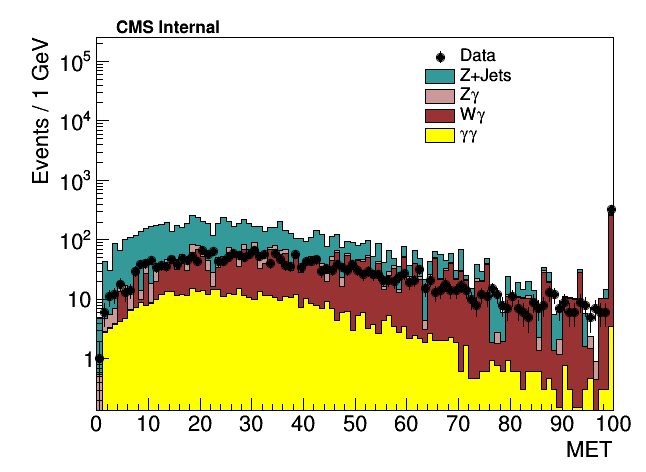

Info in <TCanvas::Print>: png file /tmp/tmpGKgEw2.png has been created


In [42]:
samples.curr_canvases["top"]

## Conclusion

- MET distribution looks roughly fine here

Full documentation: http://hepcms-hn.umd.edu/~kakw/Reco_mass_tail_2018_09_17.html

#   

#   

#   

#   

# BACKUP

#   


In [12]:
samples.Draw("ph_pt[0]"," abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200",(120,0,600),{"xlabel":"p_{T}(e)","logy":1,"ymin":10,"blind":False});

ph_pt[0] :  abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


### photon pT requiring photon |eta| < 1.4  and m(e,g)>200GeV

- photon objects in Data tends to the beampipe and leaves  tranverse energy behind

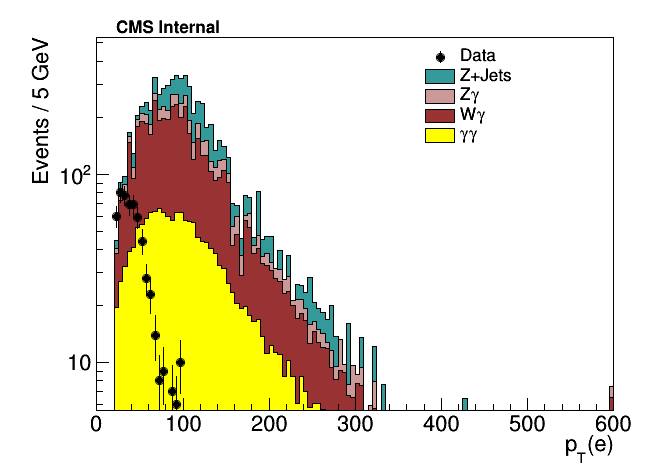

Info in <TCanvas::Print>: png file /tmp/tmpoMx_4y.png has been created


In [13]:
samples.curr_canvases["top"]

In [1]:
!bash /home/kakw/forjupyter/jupyterconvert.sh /home/kakw/public_html/ Reco_mass_tail_2018_09_17.ipynb

**** Following environment variables are going to be unset.
       DBS_CLIENT_CONFIG
       DBSCMD_HOME
       PYTHON_VALGRIND_SUPP
[NbConvertApp] Converting notebook Reco_mass_tail_2018_09_17.ipynb to slides
[NbConvertApp] Writing 438547 bytes to Reco_mass_tail_2018_09_17.slides.html
[NbConvertApp] Converting notebook Reco_mass_tail_2018_09_17.ipynb to html
[NbConvertApp] Writing 484206 bytes to Reco_mass_tail_2018_09_17.html
Fri Sep 21 15:18:06 EDT 2018
